# Enunciado

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pycountry

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [2]:
df = pd.read_csv("./data/covid19_confirmados.csv")
df = df.set_index("Country/Region")
df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [3]:
df.shape

(284, 813)

In [4]:
df = df.drop(["Lat", "Long"], axis=1)
df.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,NaN,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,NaN,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [5]:
fechas = pd.to_datetime(df.columns[1:], format='%m/%d/%y')
df.columns = ["Province/State"] + list(fechas)
df.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,NaN,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,NaN,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


In [6]:
df = df.groupby("Country/Region")[df.columns[1:]].sum()
df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194


Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [7]:
df_pop = pd.read_csv("./data/poblacion_mundial2020.csv")
df_pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [8]:
df_pop = df_pop.set_index("Country (or dependency)")
df_pop.head()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country (or dependency),,,,,,,,,,
China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [9]:
len(df.index)

198

In [10]:
len(df_pop.index)

235

In [11]:
for country in df.index:
    if country not in df_pop.index:
        print(f"El pais {country} no está")

El pais Antarctica no está
El pais Burma no está
El pais Congo (Brazzaville) no está
El pais Congo (Kinshasa) no está
El pais Cote d'Ivoire no está
El pais Czechia no está
El pais Diamond Princess no está
El pais Korea, South no está
El pais Kosovo no está
El pais MS Zaandam no está
El pais Saint Kitts and Nevis no está
El pais Saint Vincent and the Grenadines no está
El pais Sao Tome and Principe no está
El pais Summer Olympics 2020 no está
El pais Taiwan* no está
El pais US no está
El pais West Bank and Gaza no está
El pais Winter Olympics 2022 no está


In [12]:
#Para verificar paises en df2
[c for c in df_pop.index if c.startswith("G")]

['Germany',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Greece',
 'Georgia',
 'Gambia',
 'Gabon',
 'Guinea-Bissau',
 'Guyana',
 'Guadeloupe',
 'Guam',
 'Grenada',
 'Greenland',
 'Gibraltar']

In [13]:
#Antartica no está
#Burma no está
#Congo -> hay 2
#Cote d'Ivoire -> Côte d'Ivoire
#Czechia -> Czech Republic (Czechia)
#Diamond Princess no está (barco)
#Korea, South -> South Korea
#Kosovo no está
#MS Zaandam no está (barco)
#Saint Kitts -> Saint Kitts & Nevis'
#Saint Vincent -> St. Vincent & Grenadines
#Sao Tome and Principe -> Sao Tome & Principe
#Summer Olympics 2020 no está (evento)
#Taiwan* -> Taiwan
#US -> United States
#West Bank and Gaza no está 
#Winter Olympics 2022 no está (evento)
#

In [14]:
cambiar_por = ["Cote d'Ivoire", "Czechia", "Korea, South",  "Saint Vincent", "Sao Tome and Principe", 
                    "Taiwan*", "US"]

paises_a_cambiar  = ["Côte d'Ivoire", "Czech Republic (Czechia)", "South Korea", "St. Vincent & Grenadines",
               "Sao Tome & Principe", "Taiwan", "United States"]

lista_index_df1 = list(df.index)
lista_index_df2 = list(df_pop.index)

i = 0

while(i != len(cambiar_por)):
    index = lista_index_df2.index(paises_a_cambiar[i])
    print(f"cambio {lista_index_df2[index]} por {cambiar_por[i]}")
    lista_index_df2[index] = cambiar_por[i]
    i+=1

df.index = lista_index_df1
df_pop.index = lista_index_df2

cambio Côte d'Ivoire por Cote d'Ivoire
cambio Czech Republic (Czechia) por Czechia
cambio South Korea por Korea, South
cambio St. Vincent & Grenadines por Saint Vincent
cambio Sao Tome & Principe por Sao Tome and Principe
cambio Taiwan por Taiwan*
cambio United States por US


Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

In [15]:
df_pop.head()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
US,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [16]:
df.index.name = "Country"
df_pop.index.name = "Country"

In [17]:
df_merged = pd.merge(df, df_pop[["Population (2020)"]], left_index=True, right_index=True, how="inner")

In [18]:
df_merged.head()

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177803,177827,177897,177932,177974,177974,177974,177974,177974,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,273823,273870,273913,274000,274055,274108,274136,274191,274219,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,265684,265691,265694,265699,265705,265707,265714,265720,265724,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40328,40328,40328,40328,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,33032075


Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [19]:
df_rec = pd.read_csv("./data/covid19_recuperados.csv")
df_rec = df_rec.set_index("Country/Region")
df_rec.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_rec = df_rec.drop(["Lat", "Long"], axis=1)
df_rec.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
fechas = pd.to_datetime(df_rec.columns[1:], format='%m/%d/%y')
df_rec.columns = ["Province/State"] + list(fechas)
df_rec.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_rec = df_rec.groupby("Country/Region")[df_rec.columns[1:]].sum()
df_rec.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_rec.index.name = "Country"

In [24]:
df_rec_merged = pd.merge(df_rec, df_pop[["Population (2020)"]], left_index=True, right_index=True, how="inner")
df_rec_merged.head()

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33032075


In [25]:
df_m = pd.read_csv("./data/covid19_muertes.csv")
df_m = df_m.set_index("Country/Region")
df_m.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [26]:
df_m = df_m.drop(["Lat", "Long"], axis=1)
df_m.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/1/22,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,NaN,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [27]:
fechas = pd.to_datetime(df_m.columns[1:], format='%m/%d/%y')
df_m.columns = [df_m.columns[0]] + list(fechas)
df_m.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2022-04-01 00:00:00,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,NaN,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [28]:
df_m = df_m.groupby("Country/Region")[df_m.columns[1:]].sum()
df_m.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7670,7671,7671,7671,7671,7671,7671,7671,7671,7671
Albania,0,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3492,3493
Algeria,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6874
Andorra,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [29]:
df_m.index.name = "Country"
df_m_merged = pd.merge(df_m, df_pop[["Population (2020)"]], left_index=True, right_index=True, how="inner")
df_m_merged.head()

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7671,7671,7671,7671,7671,7671,7671,7671,7671,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3493,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,33032075


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [30]:
def tasas(fecha):
    try:
        tasa_inc=df_merged[fecha].sum(axis=1) * 100_000 / df_merged["Population (2020)"].sum()
        tasa_rec= df_rec_merged[fecha].sum(axis=1) * 100_000 / df_rec_merged["Population (2020)"].sum()
        tasa_mort=df_m_merged[fecha].sum(axis=1) * 100_000 / df_m_merged["Population (2020)"].sum()
    except ValueError:
        tasa_inc=df_merged[fecha] * 100_000 / df_merged["Population (2020)"].sum()
        tasa_rec= df_rec_merged[fecha] * 100_000 / df_rec_merged["Population (2020)"].sum()
        tasa_mort=df_m_merged[fecha] * 100_000 / df_m_merged["Population (2020)"].sum()

    return tasa_inc,tasa_mort,tasa_rec


In [31]:
fecha1 = "22th of January of 2021"
tasas_inc,tasas_mort,tasas_rec = tasas(pd.to_datetime(fecha1))
tasas_inc_sorted = tasas_inc.sort_values()
tasas_rec_sorted = tasas_rec.sort_values()
tasas_mort_sorted = tasas_mort.sort_values()

print(f"Los paises con la mayor incidencia de 22-01-2021 son:")
print(f"\t{tasas_inc_sorted.index[-1]}")
print(f"\t{tasas_inc_sorted.index[-2]}")
print(f"\t{tasas_inc_sorted.index[-3]}\n")

print(f"Los paises con la menor incidencia de 22-01-2021 son:")
print(f"\t{tasas_inc_sorted.index[0]}")
print(f"\t{tasas_inc_sorted.index[1]}")
print(f"\t{tasas_inc_sorted.index[2]}\n")

print(f"Los paises con la mayor recuperacion de 22-01-2021 son:")
print(f"\t{tasas_rec_sorted.index[-1]}")
print(f"\t{tasas_rec_sorted.index[-2]}")
print(f"\t{tasas_rec_sorted.index[-3]}\n")

print(f"Los paises con la menor recuperacion de 22-01-2021 son:")
print(f"\t{tasas_rec_sorted.index[0]}")
print(f"\t{tasas_rec_sorted.index[1]}")
print(f"\t{tasas_rec_sorted.index[2]}\n")

print(f"Los paises con la mayor mortalidad de 22-01-2021 son:")
print(f"\t{tasas_mort_sorted.index[-1]}")
print(f"\t{tasas_mort_sorted.index[-2]}")
print(f"\t{tasas_mort_sorted.index[-3]}\n")

print(f"Los paises con la menor mortalidad de 22-01-2021 son:")
print(f"\t{tasas_mort_sorted.index[0]}")
print(f"\t{tasas_mort_sorted.index[1]}")
print(f"\t{tasas_mort_sorted.index[2]}\n")


posicion_inc = tasas_inc_sorted.index.get_loc("Chile")
posicion_rec = tasas_rec_sorted.index.get_loc("Chile")
posicion_mort = tasas_mort_sorted.index.get_loc("Chile")


print(f"Chile se encuentra en la posicion {posicion_inc} de tasa de incidencia a nivel mundial")
print(f"Chile se encuentra en la posicion {posicion_rec} de tasa de recuperacion a nivel mundial")
print(f"Chile se encuentra en la posicion {posicion_mort} de tasa de mortalidad a nivel mundial")

Los paises con la mayor incidencia de 22-01-2021 son:
	US
	India
	Brazil

Los paises con la menor incidencia de 22-01-2021 son:
	Palau
	Kiribati
	Tonga

Los paises con la mayor recuperacion de 22-01-2021 son:
	India
	Brazil
	Russia

Los paises con la menor recuperacion de 22-01-2021 son:
	Tonga
	Palau
	Sweden

Los paises con la mayor mortalidad de 22-01-2021 son:
	US
	Brazil
	India

Los paises con la menor mortalidad de 22-01-2021 son:
	Palau
	Laos
	Dominica

Chile se encuentra en la posicion 162 de tasa de incidencia a nivel mundial
Chile se encuentra en la posicion 167 de tasa de recuperacion a nivel mundial
Chile se encuentra en la posicion 164 de tasa de mortalidad a nivel mundial


In [32]:
fecha2 = "22th of January of 2022"
tasas_inc,tasas_mort,tasas_rec = tasas(pd.to_datetime(fecha2))
tasas_inc_sorted = tasas_inc.sort_values()
tasas_rec_sorted = tasas_rec.sort_values()
tasas_mort_sorted = tasas_mort.sort_values()

print(f"Los paises con la mayor incidencia de 22-01-2022 son:")
print(f"\t{tasas_inc_sorted.index[-1]}")
print(f"\t{tasas_inc_sorted.index[-2]}")
print(f"\t{tasas_inc_sorted.index[-3]}\n")

print(f"Los paises con la menor incidencia de 22-01-2022 son:")
print(f"\t{tasas_inc_sorted.index[0]}")
print(f"\t{tasas_inc_sorted.index[1]}")
print(f"\t{tasas_inc_sorted.index[2]}\n")

print(f"Los paises con la mayor recuperacion de 22-01-2022 son:")
print(f"\t{tasas_rec_sorted.index[-1]}")
print(f"\t{tasas_rec_sorted.index[-2]}")
print(f"\t{tasas_rec_sorted.index[-3]}\n")

print(f"Los paises con la menor recuperacion de 22-01-2022 son:")
print(f"\t{tasas_rec_sorted.index[0]}")
print(f"\t{tasas_rec_sorted.index[1]}")
print(f"\t{tasas_rec_sorted.index[2]}\n")

print(f"Los paises con la mayor mortalidad de 22-01-2022 son:")
print(f"\t{tasas_mort_sorted.index[-1]}")
print(f"\t{tasas_mort_sorted.index[-2]}")
print(f"\t{tasas_mort_sorted.index[-3]}\n")

print(f"Los paises con la menor mortalidad de 22-01-2022 son:")
print(f"\t{tasas_mort_sorted.index[0]}")
print(f"\t{tasas_mort_sorted.index[1]}")
print(f"\t{tasas_mort_sorted.index[2]}\n")


posicion_inc = tasas_inc_sorted.index.get_loc("Chile")
posicion_rec = tasas_rec_sorted.index.get_loc("Chile")
posicion_mort = tasas_mort_sorted.index.get_loc("Chile")


print(f"Chile se encuentra en la posicion {posicion_inc} de tasa de incidencia a nivel mundial")
print(f"Chile se encuentra en la posicion {posicion_rec} de tasa de recuperacion a nivel mundial")
print(f"Chile se encuentra en la posicion {posicion_mort} de tasa de mortalidad a nivel mundial")

Los paises con la mayor incidencia de 22-01-2022 son:
	US
	India
	Brazil

Los paises con la menor incidencia de 22-01-2022 son:
	Tonga
	Micronesia
	Vanuatu

Los paises con la mayor recuperacion de 22-01-2022 son:
	Zimbabwe
	France
	Guinea

Los paises con la menor recuperacion de 22-01-2022 son:
	Afghanistan
	Nepal
	Netherlands

Los paises con la mayor mortalidad de 22-01-2022 son:
	US
	Brazil
	India

Los paises con la menor mortalidad de 22-01-2022 son:
	Kiribati
	Marshall Islands
	Solomon Islands

Chile se encuentra en la posicion 152 de tasa de incidencia a nivel mundial
Chile se encuentra en la posicion 103 de tasa de recuperacion a nivel mundial
Chile se encuentra en la posicion 163 de tasa de mortalidad a nivel mundial


Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [33]:
tasa_2021 = tasas(pd.date_range(start="1st of January of 2021", end="31th of January of 2021", freq='D'))[0]
tasa_2021.name = "tasa_2021"
tasa_2022 = tasas(pd.date_range(start="1st of January of 2022", end="31th of January of 2022", freq='D'))[0]
tasa_2022.name = "tasa_2022"

In [34]:
df_enero = pd.concat([tasa_2021, tasa_2022], axis=1)

In [35]:
df_enero.head()

,tasa_2021,tasa_2022
Country,,
Afghanistan,21.974570,64.931564
Albania,27.456238,94.905584
Algeria,42.236547,93.893714
Andorra,3.671407,12.253375
Angola,7.629937,37.755705


In [36]:
!pip install pycountry_convert

In [37]:
import pycountry_convert as pc

def obtener_continente(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except (KeyError, TypeError):
        if (country_name == "US"):
            return "North America"
        if(country_name == "Korea, South"):
            return "Asia"
        if(country_name == "Taiwan*"):
            return "Asia"
        return "unknow"

In [38]:
continentes = [obtener_continente(pais) for pais in list(df_merged.index)]

In [39]:
df_enero["continente"] = continentes
df_enero["continente"]

Country
Afghanistan             Asia
Albania               Europe
Algeria               Africa
Andorra               Europe
Angola                Africa
                   ...      
Venezuela      South America
Vietnam                 Asia
Yemen                   Asia
Zambia                Africa
Zimbabwe              Africa
Name: continente, Length: 186, dtype: object

In [40]:
df_enero.head()

,tasa_2021,tasa_2022,continente
Country,,,
Afghanistan,21.974570,64.931564,Asia
Albania,27.456238,94.905584,Europe
Algeria,42.236547,93.893714,Africa
Andorra,3.671407,12.253375,Europe
Angola,7.629937,37.755705,Africa


In [41]:
df_enero["continente"].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'unknow'], dtype=object)

In [42]:
continent_colors = {'Asia': 'green', 'Europe': 'blue', 'Africa': 'orange', 
                    'North America': 'red', 'South America': 'purple', "Oceania": "black", "unknow": "gray"}

In [43]:
df_enero['color'] = df_enero['continente'].map(continent_colors)
df_enero.head()

,tasa_2021,tasa_2022,continente,color
Country,,,,
Afghanistan,21.974570,64.931564,Asia,green
Albania,27.456238,94.905584,Europe,blue
Algeria,42.236547,93.893714,Africa,orange
Andorra,3.671407,12.253375,Europe,blue
Angola,7.629937,37.755705,Africa,orange


In [44]:
pycountry.countries.search_fuzzy("South Korea")[0]

Country(alpha_2='KR', alpha_3='KOR', common_name='South Korea', flag='🇰🇷', name='Korea, Republic of', numeric='410')

No se encontró el país Laos en la base de datos.


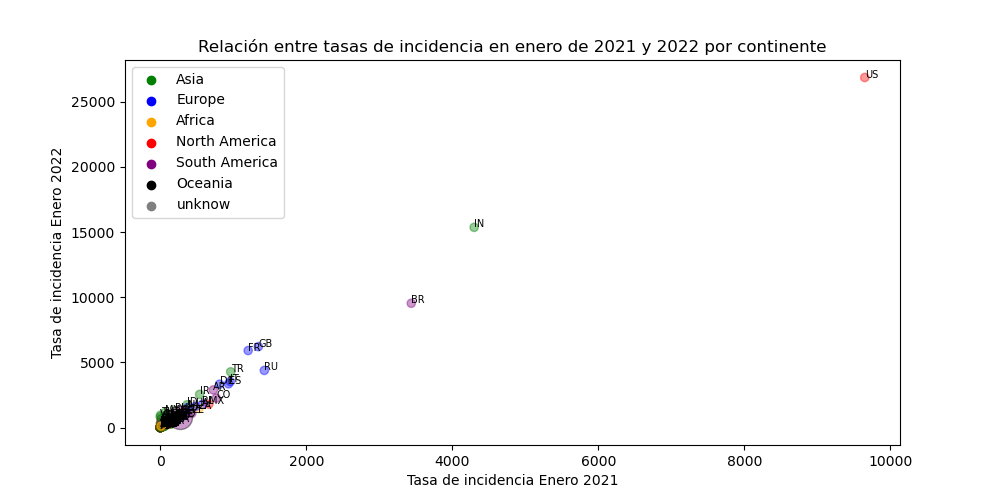

In [45]:
# Obtener los códigos alpha-2 de los países
%matplotlib ipympl
country_codes = {}
for country in df_enero.index:
    
    if(country == "Korea, South"):
        country = "South Korea"
    if(country == "Taiwan*"):
        country = "Taiwan"

    try:
        country_obj = pycountry.countries.search_fuzzy(country)[0]
        country_codes[country] = country_obj.alpha_2
    except (LookupError, KeyError):
        print(f"No se encontró el país {country} en la base de datos.")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 5))
pais="Chile"
pais_size=300
# Resto de los países
mask_resto = df_enero.index != pais
df_resto = df_enero[mask_resto]
ax.scatter(df_resto["tasa_2021"], df_resto["tasa_2022"], 
           c=df_resto["color"], alpha=0.4)

# País de interés
mask_pais = df_enero.index == pais
df_pais = df_enero[mask_pais]
ax.scatter(df_pais["tasa_2021"], df_pais["tasa_2022"], 
           c=df_pais["color"], alpha=0.4, s=pais_size, edgecolors='black')

# Anotar los códigos de los países
for country, code in country_codes.items():
    if(country == "South Korea"):
        country = "Korea, South"
    if(country == "Taiwan"):
        country = "Taiwan*"
    x = df_enero.loc[country, "tasa_2021"]
    y = df_enero.loc[country, "tasa_2022"]
    ax.annotate(code, (x, y), fontsize=7)

# Ajustar los ejes y el título
ax.set_xlabel("Tasa de incidencia Enero 2021")
ax.set_ylabel("Tasa de incidencia Enero 2022")
ax.set_title("Relación entre tasas de incidencia en enero de 2021 y 2022 por continente")

# Añadir leyenda
for continent, color in continent_colors.items():
    ax.scatter([], [], c=color, label=continent)
ax.legend()



In [46]:
tasa_m_2021 = tasas(pd.date_range(start="1th of January of 2021", end="31th of January of 2021", freq='D'))[1]
tasa_m_2021.name = "tasa_2021"

In [47]:
df_enero = pd.concat([tasa_m_2021, tasa_2022], axis=1)

In [48]:
df_enero["continente"] = continentes

In [49]:
df_enero['color'] = df_enero['continente'].map(continent_colors)
df_enero.head()

,tasa_2021,tasa_2022,continente,color
Country,,,,
Afghanistan,0.945260,64.931564,Asia,green
Albania,0.519103,94.905584,Europe,blue
Algeria,1.153572,93.893714,Africa,orange
Andorra,0.036882,12.253375,Europe,blue
Angola,0.177255,37.755705,Africa,orange


No se encontró el país Laos en la base de datos.


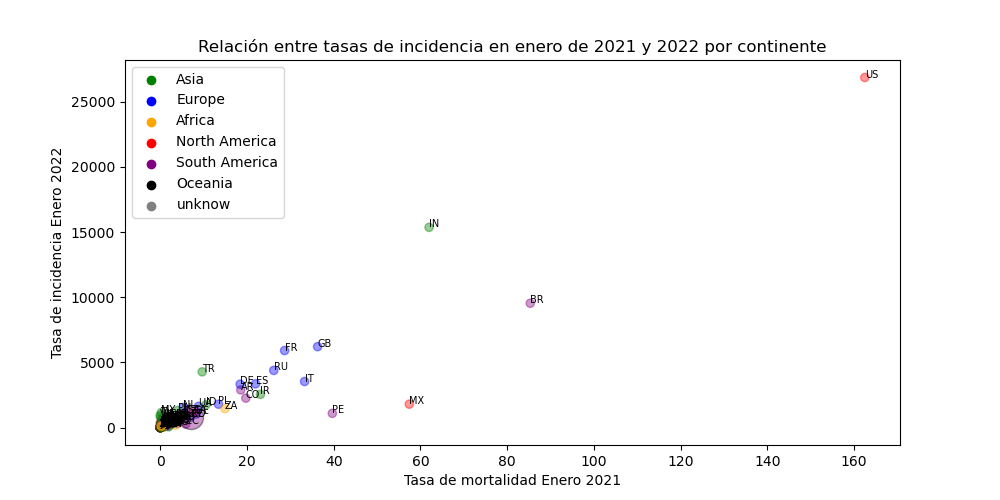

In [50]:
# Obtener los códigos alpha-2 de los países
%matplotlib ipympl
country_codes = {}
for country in df_enero.index:
    if(country == "Korea, South"):
        country = "South Korea"
    if(country == "Taiwan*"):
        country = "Taiwan"
    try:
        country_obj = pycountry.countries.search_fuzzy(country)[0]
        country_codes[country] = country_obj.alpha_2
    except LookupError:
        print(f"No se encontró el país {country} en la base de datos.")

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 5))
pais="Chile"
pais_size=300
# grafico resto de los países
mask_resto = df_enero.index != pais
df_resto = df_enero[mask_resto]
ax.scatter(df_resto["tasa_2021"], df_resto["tasa_2022"], 
           c=df_resto["color"], alpha=0.4)

#grafico chile
mask_pais = df_enero.index == pais
df_pais = df_enero[mask_pais]
ax.scatter(df_pais["tasa_2021"], df_pais["tasa_2022"], 
           c=df_pais["color"], alpha=0.4, s=pais_size, edgecolors='black')

# Anotar los códigos de los países
for country, code in country_codes.items():
    if(country == "South Korea"):
        country = "Korea, South"
    if(country == "Taiwan"):
        country = "Taiwan*"
        
    x = df_enero.loc[country, "tasa_2021"]
    y = df_enero.loc[country, "tasa_2022"]
    ax.annotate(code, (x, y), fontsize=7)

# Ajustar los ejes y el título
ax.set_xlabel("Tasa de mortalidad Enero 2021")
ax.set_ylabel("Tasa de incidencia Enero 2022")
ax.set_title("Relación entre tasas de incidencia en enero de 2021 y 2022 por continente")

# Añadir leyenda
for continent, color in continent_colors.items():
    ax.scatter([], [], c=color, label=continent)
ax.legend()


En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


Analizando ambos gráficos, se puede ver que los paises más parecidos a Chile son: `Rumania`, `Canadá` y `Bélgica.`

- En el primer gráfico de incidencias del 22 de enero 2021 y 2022, si tomamos a Chile como elemento central, los paises que estén a su derecha habrán tenido mas incidencia en 2022 y los que están por sobre este, la habrán tenido en 2021.

    - Rumania se ve que tuvo una menor incidencia en 2022 y una incidencia similar en 2021. En cambio, Canadá y Bélgica tuvieron una mayor incidencia tanto en 2021 como en 2022, pero no mucha más que Chile.
    - 

- En el segundo gráfico de mortalidad 2021 e incidencia 2022, si tomamos a Chile como elemento central, los paises a su derecha habrán tenido mas casos en el dia de 2022, mientras los que esten por sobre este habrán tenido mas decesos en el dia de 2021. 

- Rumania se ve que tuvo un menor numero de casos, pero una mayor cantidad de decesos. Mientras que Canadá y Bélgica son mayores en ambos casos. Nuevamente, la diferencia con Chile no es mucha.

- Los paises sudamericanos que se parecen a Chile son:

    - En el primer gráfico (incidencias 2021 vs 2022): Perú y Ecuador. Se ve que Perú tuvo una leve incidencia mayor en 2021 y una también mayor en 2022, en cambio, Ecuador tuvo una menor en ambos años.

    - En el segundo gráfico (muertes 2021 vs incidencia 2022): Ecuador y Bolivia. Tanto Ecuador como Bolivia tuvieron una menor incidencia y muertes tanto en 2021 como en 2022.

- Los paises de la OCDE que se parecen a Chile son:
    - Para el primer gráfico (incidencias 2021 vs 2022): Belgica y Portugal, teniendo ambos un número similar de incidencias en 2021 y siendo menor Portugal y mayor Belgica en 2022.
    
    - Para el segundo gráfico (incidencias 2022 vs decesos 2022): Bélgica y Pakistan, siendo Bélgica la que tuvo mayores incidencias y decesos, mientras que Pakistan fue menor en ambas.

## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



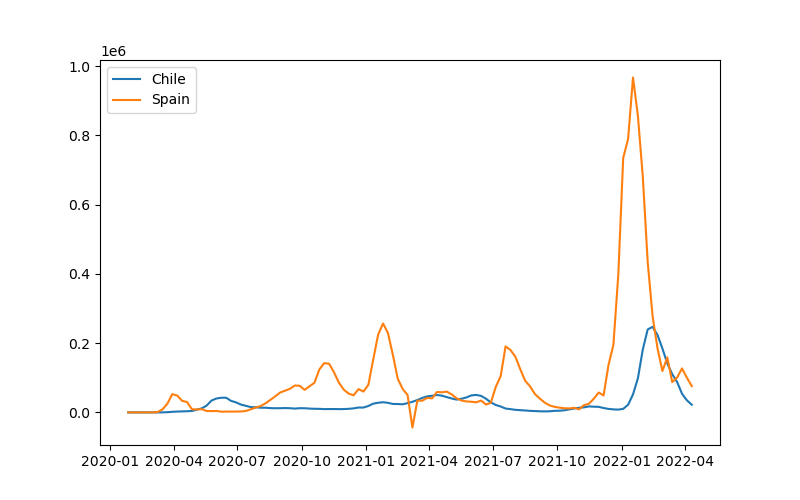

In [ ]:
# df_merged
# df_rec_merged
# df_m_merged

%matplotlib ipympl

import ipywidgets as widgets
from IPython.display import clear_output
def graficar_casos_confirmados(pais1, pais2,tipo1,tipo2,tipo3):
    plt.figure(figsize=(8, 5))
    if(tipo1=="Semanal"):
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_merged.loc[pais1][:-1]/df_merged.loc[pais1]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot((df_merged.loc[pais2][:-1]/df_merged.loc[pais2]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)  
            else:
                plt.plot((df_merged.loc[pais1][:-1]/df_merged.loc[pais1]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot((df_merged.loc[pais2][:-1]/df_merged.loc[pais2]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_merged.loc[pais1][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot(df_merged.loc[pais2][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
            else:
                plt.plot(df_merged.loc[pais1][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot(df_merged.loc[pais2][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
    else:
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_merged.loc[pais1][:-1]/df_merged.loc[pais1]["Population (2020)"]*100000).diff(), label=pais1) 
                plt.plot((df_merged.loc[pais2][:-1]/df_merged.loc[pais2]["Population (2020)"]*100000).diff(), label=pais2)    
            else:
                plt.plot((df_merged.loc[pais1][:-1]/df_merged.loc[pais1]["Population (2020)"]*100000), label=pais1) 
                plt.plot((df_merged.loc[pais2][:-1]/df_merged.loc[pais2]["Population (2020)"]*100000), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_merged.loc[pais1][:-1].diff(), label=pais1) 
                plt.plot(df_merged.loc[pais2][:-1].diff(), label=pais2)
            else:
                plt.plot(df_merged.loc[pais1][:-1], label=pais1) 
                plt.plot(df_merged.loc[pais2][:-1], label=pais2)

    plt.legend()
    
def graficar_personas_recuperadas(pais1, pais2,tipo1,tipo2,tipo3):
    plt.figure(figsize=(8, 5))       
    if(tipo1=="Semanal"):
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_rec_merged.loc[pais1][:-1]/df_rec_merged.loc[pais1]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot((df_rec_merged.loc[pais2][:-1]/df_rec_merged.loc[pais2]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)  
            else:
                plt.plot((df_rec_merged.loc[pais1][:-1]/df_rec_merged.loc[pais1]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot((df_rec_merged.loc[pais2][:-1]/df_rec_merged.loc[pais2]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_rec_merged.loc[pais1][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot(df_rec_merged.loc[pais2][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
            else:
                plt.plot(df_rec_merged.loc[pais1][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot(df_rec_merged.loc[pais2][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
    else:
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_rec_merged.loc[pais1][:-1]/df_rec_merged.loc[pais1]["Population (2020)"]*100000).diff(), label=pais1) 
                plt.plot((df_rec_merged.loc[pais2][:-1]/df_rec_merged.loc[pais2]["Population (2020)"]*100000).diff(), label=pais2)    
            else:
                plt.plot((df_rec_merged.loc[pais1][:-1]/df_rec_merged.loc[pais1]["Population (2020)"]*100000), label=pais1) 
                plt.plot((df_rec_merged.loc[pais2][:-1]/df_rec_merged.loc[pais2]["Population (2020)"]*100000), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_rec_merged.loc[pais1][:-1].diff(), label=pais1) 
                plt.plot(df_rec_merged.loc[pais2][:-1].diff(), label=pais2)
            else:
                plt.plot(df_rec_merged.loc[pais1][:-1], label=pais1) 
                plt.plot(df_rec_merged.loc[pais2][:-1], label=pais2)

    plt.legend()
  
def graficar_cantidad_descesos(pais1, pais2,tipo1,tipo2,tipo3):
    plt.clf()
    plt.figure(figsize=(8, 5))            
    if(tipo1=="Semanal"):
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_m_merged.loc[pais1][:-1]/df_m_merged.loc[pais1]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot((df_rec_merged.loc[pais2][:-1]/df_m_merged.loc[pais2]["Population (2020)"]*100000).diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)  
            else:
                plt.plot((df_m_merged.loc[pais1][:-1]/df_m_merged.loc[pais1]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot((df_m_merged.loc[pais2][:-1]/df_m_merged.loc[pais2]["Population (2020)"]*100000).reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_m_merged.loc[pais1][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1)
                plt.plot(df_m_merged.loc[pais2][:-1].diff().reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
            else:
                plt.plot(df_m_merged.loc[pais1][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais1) 
                plt.plot(df_m_merged.loc[pais2][:-1].reset_index().groupby(pd.Grouper(key='index', freq='W-MON')).sum(), label=pais2)
    else:
        if(tipo3=="relativo"):
            if(tipo2=="nuevos"):
                plt.plot((df_m_merged.loc[pais1][:-1]/df_m_merged.loc[pais1]["Population (2020)"]*100000).diff(), label=pais1) 
                plt.plot((df_m_merged.loc[pais2][:-1]/df_m_merged.loc[pais2]["Population (2020)"]*100000).diff(), label=pais2)    
            else:
                plt.plot((df_m_merged.loc[pais1][:-1]/df_m_merged.loc[pais1]["Population (2020)"]*100000), label=pais1) 
                plt.plot((df_m_merged.loc[pais2][:-1]/df_m_merged.loc[pais2]["Population (2020)"]*100000), label=pais2)
        elif(tipo3=="absoluto"):
            if(tipo2=="nuevos"):    
                plt.plot(df_m_merged.loc[pais1][:-1].diff(), label=pais1) 
                plt.plot(df_m_merged.loc[pais2][:-1].diff(), label=pais2)
            else:
                plt.plot(df_m_merged.loc[pais1][:-1], label=pais1) 
                plt.plot(df_m_merged.loc[pais2][:-1], label=pais2)          
    plt.legend()
    
paises= list(df_rec_merged.index)

ocde_codigos = ['AU', 'AT', 'BE', 'CA', 'CL', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IR', 'IL', 'IT', 'JP', 'KR', 'LV', 'LT', 'LU', 'MX', 'NL', 'NZ', 'NO', 'PL', 'PT', 'SK', 'SI', 'ES', 'SE', 'CH', 'TR', 'GB', 'US']
ocde_paises=[]
for code in ocde_codigos:
   country = pycountry.countries.get(alpha_2=code)
   ocde_paises.append(country.name)
ocde_paises=[]
paises_ocde = []
for pais in paises:
    try:
        country = pycountry.countries.get(name=pais)
        if ((country.alpha_2 in ocde_codigos)):
            paises_ocde.append(pais)
    except:
        pass
paises_ocde.append("Iran") 
paises_ocde.append("US")  
paises_ocde.sort()
print(paises_ocde)
relativo_absoluto=["relativo","absoluto"]
tipo_codigo=["acumulado","nuevos"]
semanal_diario=["Semanal","Diario"]
semanal_diario_widget=widgets.Dropdown(options=semanal_diario,value=semanal_diario[0],description="Semanal o Diario")
tipo_codigos_widgets=widgets.Dropdown(options=tipo_codigo,value=tipo_codigo[0],description="Acumulado o Nuevo")
relativo_absoluto_widgets=widgets.Dropdown(options=relativo_absoluto,value=relativo_absoluto[0],description="Relativo o Absoluto")
pais1_widget = widgets.Dropdown(options=paises_ocde, value=paises_ocde[0], description='País 1:')
pais2_widget = widgets.Dropdown(options=paises_ocde, value=paises_ocde[1], description='País 2:')

def on_button_clicked(b):
    clear_output(wait=False)
    display(tab)
    if (tab.selected_index == 0):   
        graficar_casos_confirmados(pais1_widget.value, pais2_widget.value,semanal_diario_widget.value, tipo_codigos_widgets.value, relativo_absoluto_widgets.value)
    elif(tab.selected_index == 1):        
        graficar_personas_recuperadas(pais1_widget.value, pais2_widget.value,semanal_diario_widget.value, tipo_codigos_widgets.value, relativo_absoluto_widgets.value)
    elif(tab.selected_index == 2):
        graficar_cantidad_descesos(pais1_widget.value, pais2_widget.value,semanal_diario_widget.value, tipo_codigos_widgets.value, relativo_absoluto_widgets.value)
    
    
button = widgets.Button(description='Graficar')
button.on_click(on_button_clicked)
tab=widgets.Tab()
tab1 = widgets.VBox(children=[tipo_codigos_widgets, relativo_absoluto_widgets, semanal_diario_widget,pais1_widget, pais2_widget, button])
tab2 = widgets.VBox(children=[tipo_codigos_widgets, relativo_absoluto_widgets, semanal_diario_widget,pais1_widget, pais2_widget, button])
tab3 = widgets.VBox(children=[tipo_codigos_widgets, relativo_absoluto_widgets, semanal_diario_widget,pais1_widget, pais2_widget, button])
tab.children = [tab1, tab2, tab3]
tab.set_title(0, 'Casos Confirmados')
tab.set_title(1, 'Personas Recuperadas')
tab.set_title(2, 'Cantidad de descesos')



display(tab)


## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

https://mybinder.org/v2/gh/phuijse-classroom/info147-tarea-unidad1-lentejascontomate.git/main?labpath=voila%2Frender%2Fpath%2Fto%2Fenunciado.ipynb

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.

1. - Al llegar el covid-19 a Chile hay un aumento inmediato de contagios, esto se debió a la poca preparacion o a la poca importancia de la poblacion frente al virus. Tras las medidas de control y prevención se pudo regular, sin embargo las olas de contagio eran de esperarse ya que se vio influenciada por factores como la propagación del virus mediante los nuevos tipos, y por sobretodo las épocas del año en que el virus seguia presente, tales como las vacaciones de invierno y verano.
-------------------------------------------------------------------------------------------------------------------------
2. - El primer peak se ubica en junio del 2020, disminuyendo en agosto, el segundo ocurre en el mismo periodo el 2021 y el ultimo ocurre en verano del 2022.

        - Los minimos ocurren en octubre del 2020, septiembre del 2021 y en diciembre del 2021

        - Los máximos en junio del 2020, junio del 2021, y enero - febrero 2022
-------------------------------------------------------------------------------------------------------------------------
3. - Compararemos a Chile con US, Belgica, Canadá, Japón y España.

        - `Chile vs US`: En los casos de contagio, se puede ver que US comenzó con los contagios antes que Chile, sin embargo el primer peak de contagios lo tiene este último en el mes de junio de 2020, luego US tiene un peak que llegó a Chile un tiempo después. Posteriormente ocurre un tercer peak en US, pero Chile se ve sin subidas significativas. Finalmente ambos tienen un peak muy notorio a comienzos de 2022.

        - `Chile vs Bélgica`: Al igual que con US, los contagios comienzan en Bélgic pero el primer peak lo tiene Chile, posteriormente en noviembre de 2020 Bélgica tiene un peak mayor al que tuvo Chile. En los meses siguientes ambos paises tienen un aumento de casos que disminuyen hasta julio de 2021, donde finalemnte hay un peak en ambos paises, en Belgica en diciembre de 2021 alcanzando su máximo en enero de 2022 y en febrero del mismo año en Chile.
        
        - `Chile vs Canadá`: Nuevamente los contagios comienzan en Canadá, pero el primer peak lo tiene Chile. Luego Canadá tiene un aumento de casos en diciembre de 2020 y Chile en enero de 2021. Canadá tiene 2 nuevos periodos de aumentos, estos son en mayo y octubre de 2021. Finalmente ambos tienen un aumento brusco de contagios, Canadá en enero de 2022 y Chile en Feberero del mismo año.

        - `Chile vs Japón`: Chile comienza con un aumento de contagios en mayo de 2020, Japon se ve con un aumento de casos en agosto del mismo año, luego en el aumento de Chile, Japón no presenta muchos nuevos casos diarios. Luego Japón tiene un aumento de casos en agosto de 2021, mientras que Chile en ese periodo no presenta muchos. Finalmente se repite el peak a comienzos de 2022, se puede ver que en Japón los casos se elevaron mucho mas que en Chile.

        - `Chile vs España`: Los casos comenzaron primero en España, teniendo un similar aumento en cuanto comenzó en Chile. Luego España aumenta en septiembre de 2020 donde baja en marzo de 2021 y vuelve a aumentar en Julio para finalemente tienen un peak al iniciar 2022, comenzando antes en España.

        La similitud con estos paises no es clara hasta sino el ultimo periodo temporal, donde en todos estos paises se evidenció una alza significativa. Quizas otro patron relevante es que las subidas de la gráfica comienzan un poco antes en estos paises que en Chile.